In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
apr = pd.read_csv("uber-raw-data-apr14.csv")
may = pd.read_csv("uber-raw-data-may14.csv")
jun = pd.read_csv("uber-raw-data-jun14.csv")
jul = pd.read_csv("uber-raw-data-jul14.csv")
aug = pd.read_csv("uber-raw-data-aug14.csv")
sep = pd.read_csv("uber-raw-data-sep14.csv")


In [3]:

data = pd.concat([apr, may, jun, jul, aug, sep], ignore_index=True)


In [4]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%m/%d/%Y %H:%M:%S')

data['Day'] = data['Date/Time'].dt.day
data['Month'] = data['Date/Time'].dt.month_name()
data['Year'] = data['Date/Time'].dt.year
data['DayOfWeek'] = data['Date/Time'].dt.day_name()
data['Hour'] = data['Date/Time'].dt.hour
data['Minute'] = data['Date/Time'].dt.minute
data['Second'] = data['Date/Time'].dt.second


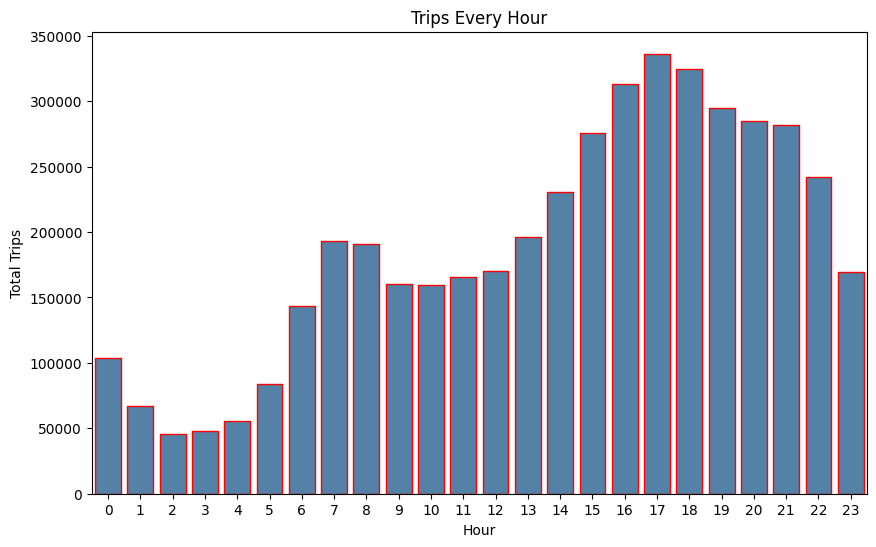

In [5]:
hour_data = data.groupby('Hour').size().reset_index(name='Total')
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_data, x='Hour', y='Total', color='steelblue', edgecolor='red')
plt.title("Trips Every Hour")
plt.ylabel("Total Trips")
plt.xticks(rotation=0)
plt.show()


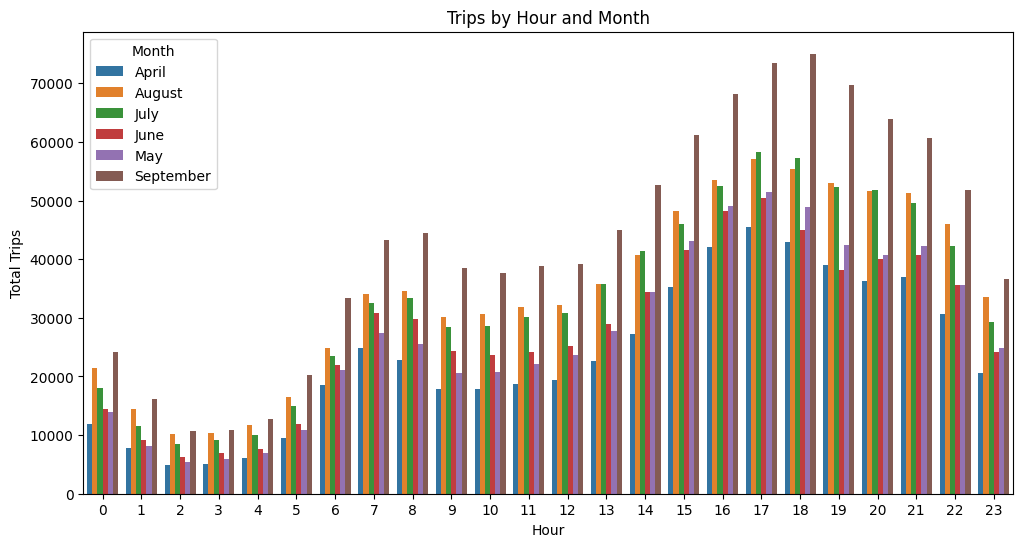

In [6]:
month_hour = data.groupby(['Month', 'Hour']).size().reset_index(name='Total')
plt.figure(figsize=(12, 6))
sns.barplot(data=month_hour, x='Hour', y='Total', hue='Month')
plt.title("Trips by Hour and Month")
plt.ylabel("Total Trips")
plt.show()


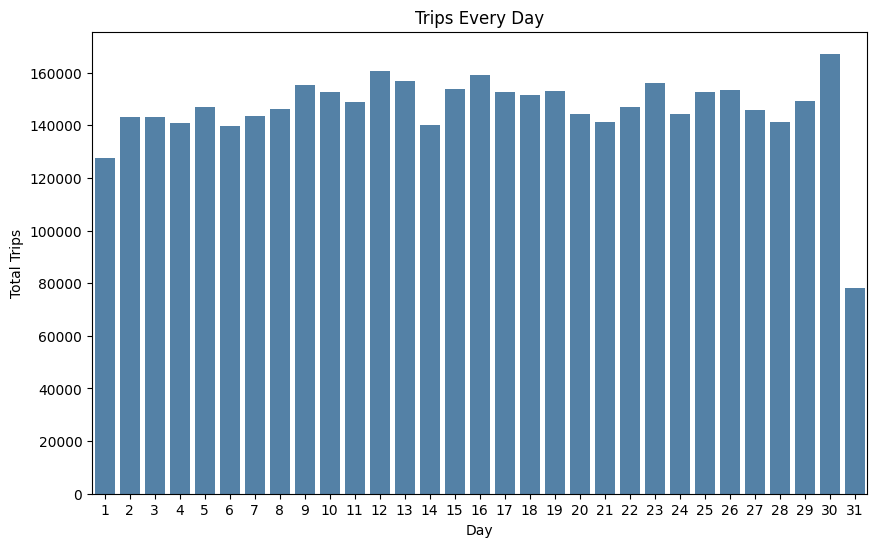

In [7]:
day_group = data.groupby('Day').size().reset_index(name='Total')
plt.figure(figsize=(10, 6))
sns.barplot(data=day_group, x='Day', y='Total', color='steelblue')
plt.title("Trips Every Day")
plt.ylabel("Total Trips")
plt.show()


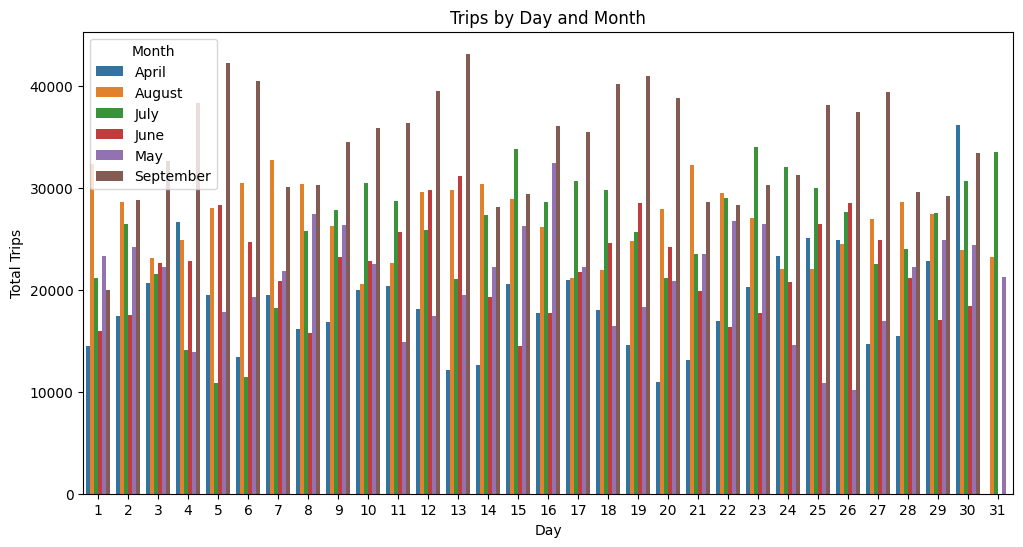

In [8]:
day_month_group = data.groupby(['Month', 'Day']).size().reset_index(name='Total')
plt.figure(figsize=(12, 6))
sns.barplot(data=day_month_group, x='Day', y='Total', hue='Month')
plt.title("Trips by Day and Month")
plt.ylabel("Total Trips")
plt.show()


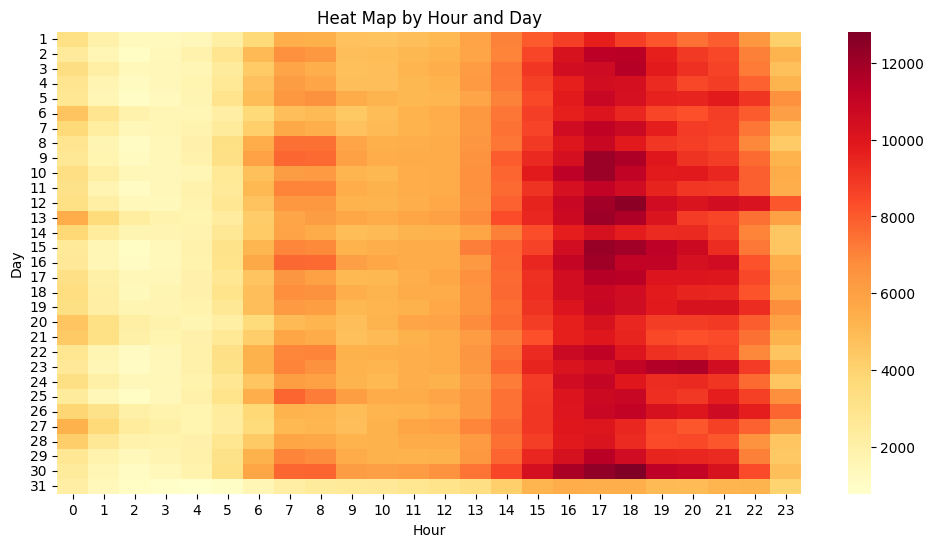

In [9]:
day_hour = data.groupby(['Day', 'Hour']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour, cmap="YlOrRd")
plt.title("Heat Map by Hour and Day")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.show()


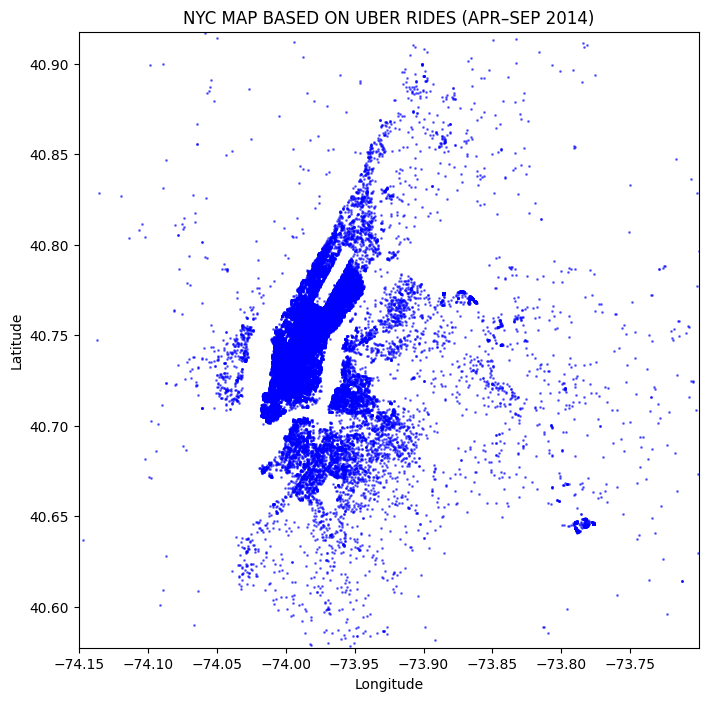

In [10]:
min_lat, max_lat = 40.5774, 40.9176
min_lon, max_lon = -74.15, -73.7004

sampled_data = data.sample(50000)  # Sample for performance

plt.figure(figsize=(8, 8))
plt.scatter(sampled_data['Lon'], sampled_data['Lat'], s=1, color='blue', alpha=0.5)
plt.title("NYC MAP BASED ON UBER RIDES (APR–SEP 2014)")
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


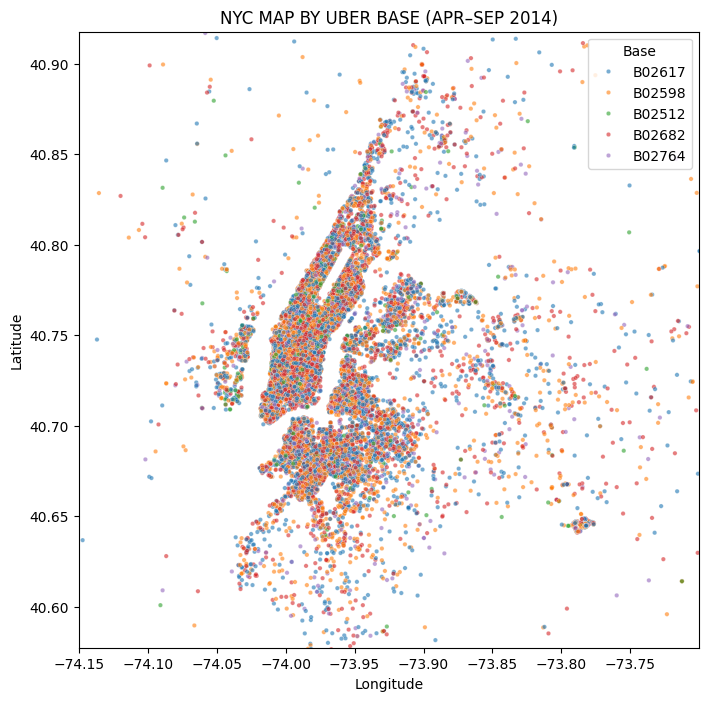

In [11]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=sampled_data, x='Lon', y='Lat', hue='Base', s=10, alpha=0.6)
plt.title("NYC MAP BY UBER BASE (APR–SEP 2014)")
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Base", loc='upper right')
plt.show()


<ipython-input-12-62f3da1ebb73>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hours, x='Hour', y='Total', palette='mako')


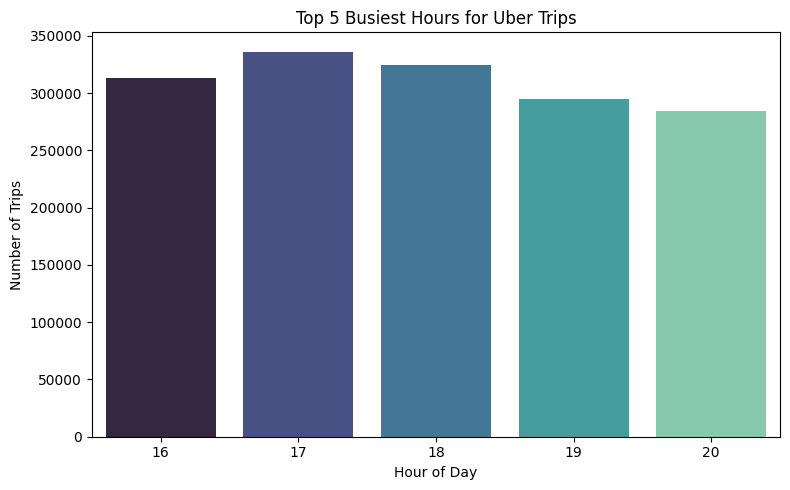

In [12]:
# Top 5 Busiest Hours
top_hours = hour_data.sort_values(by='Total', ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_hours, x='Hour', y='Total', palette='mako')
plt.title("Top 5 Busiest Hours for Uber Trips")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Load users and rides data
users = pd.read_csv("users.csv")
rides = pd.read_csv("rides.csv")


In [15]:
print(users.head())
print(users.columns)
print(rides.head())
print(rides.columns)


   user_id               name                          email  \
0        1        Tammy Jones  trevinojacqueline@example.net   
1        2      Tyler Mathews              tim47@example.com   
2        3  Melissa Robertson            scott64@example.org   
3        4       Heather Wolf         rushandrew@example.net   
4        5      Daniel Daniel           robert13@example.org   

        phone_number    registration_date  age  gender           location  
0   530-318-6905x290  2024-07-29 12:00:05   21   Other       New Alanside  
1  (222)541-3246x834  2021-10-04 14:21:09   53    Male   New Virginiabury  
2   309-644-3534x739  2022-10-07 04:46:44   57    Male         Ethanmouth  
3  998-772-1220x9334  2022-07-10 14:01:22   50    Male  South Theresaland  
4    +1-992-853-1435  2020-05-21 04:37:46   32  Female          New James  
Index(['user_id', 'name', 'email', 'phone_number', 'registration_date', 'age',
       'gender', 'location'],
      dtype='object')
   ride_id  user_id start_lo

In [16]:
# Merge datasets on user ID
merged_data = pd.merge(rides, users, on='user_id')


In [17]:
# Count rides by gender
gender_counts = merged_data['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Total Rides']
print(gender_counts)


   Gender  Total Rides
0   Other        16819
1    Male        16630
2  Female        16551


<ipython-input-18-7eb3e1086d45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x='Gender', y='Total Rides', palette='pastel')


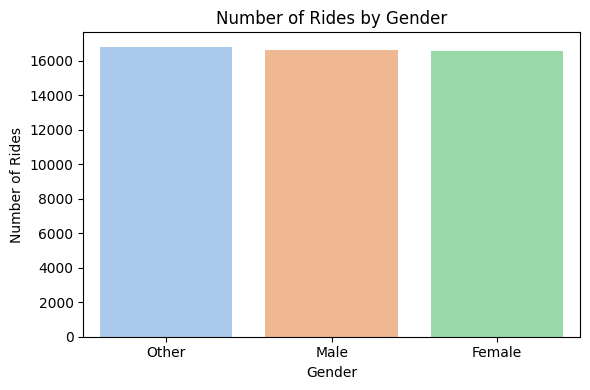

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_counts, x='Gender', y='Total Rides', palette='pastel')
plt.title("Number of Rides by Gender")
plt.ylabel("Number of Rides")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


In [35]:
import numpy as np

# Randomly assign 'Male' or 'Female' to each row (50/50 split)
np.random.seed(42)
data['Gender'] = np.random.choice(['Male', 'Female'], size=len(data), p=[0.5, 0.5])


In [36]:
data['Gender'] = np.random.choice(['Male', 'Female'], size=len(data), p=[0.6, 0.4])


<ipython-input-37-2f16c7db53b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x='Gender', y='Total Rides', palette='pastel')


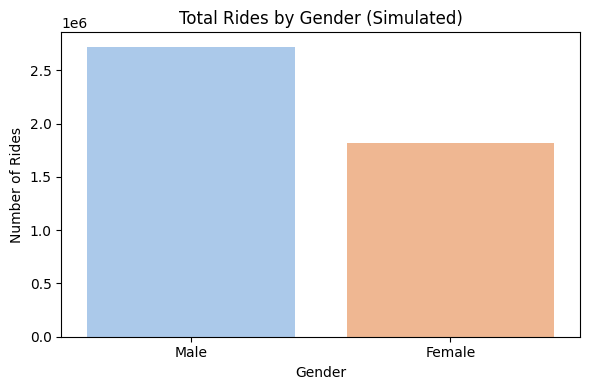

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Total Rides']

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_counts, x='Gender', y='Total Rides', palette='pastel')
plt.title("Total Rides by Gender (Simulated)")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()


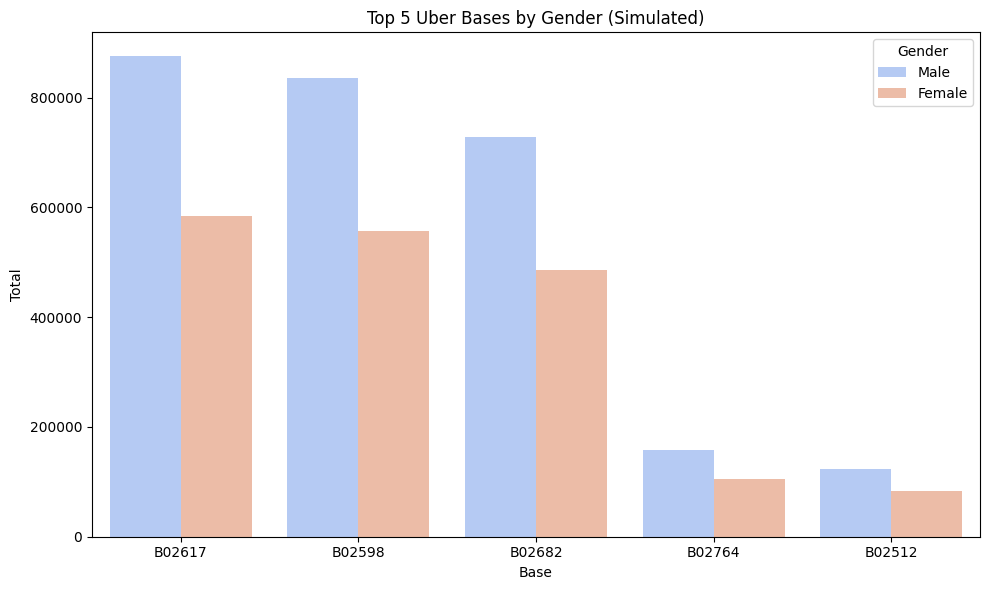

In [38]:
gender_base = data.groupby(['Gender', 'Base']).size().reset_index(name='Total')
top_bases_gender = gender_base.sort_values('Total', ascending=False).groupby('Gender').head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_bases_gender, x='Base', y='Total', hue='Gender', palette='coolwarm')
plt.title("Top 5 Uber Bases by Gender (Simulated)")
plt.tight_layout()
plt.show()


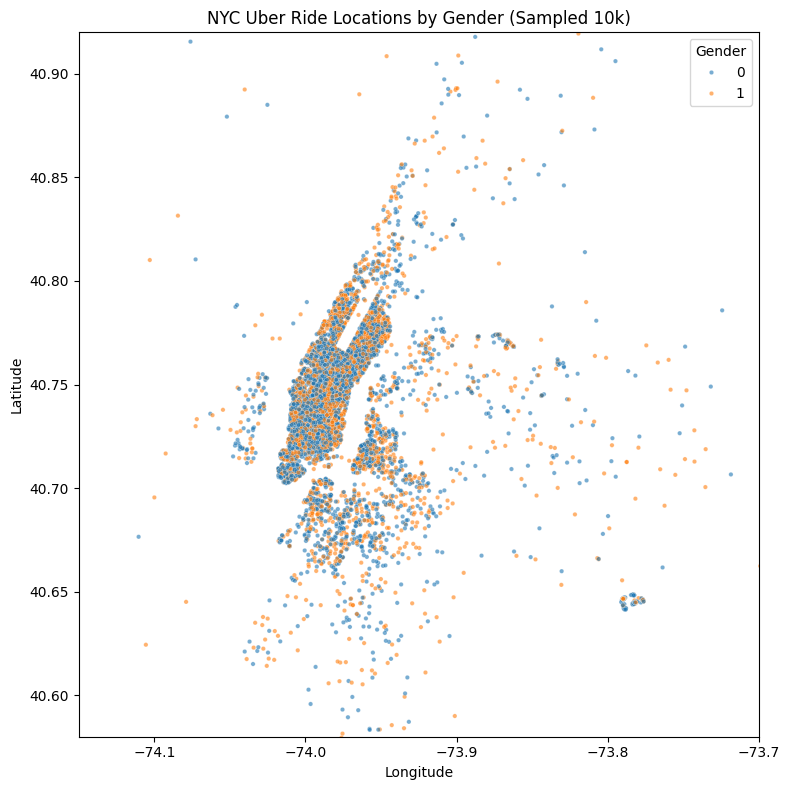

In [46]:
# Plot 4: NYC Location Map by Gender
plt.figure(figsize=(8, 8))
sns.scatterplot(data=data.sample(10000), x='Lon', y='Lat', hue='Gender', alpha=0.6, s=10)
plt.title("NYC Uber Ride Locations by Gender (Sampled 10k)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Gender")
plt.xlim(-74.15, -73.70)
plt.ylim(40.58, 40.92)
plt.tight_layout()
plt.savefig("gender_location_map.png")
plt.show()


<ipython-input-48-8e9978b8d352>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x='Gender', y='Total Rides', palette='pastel')


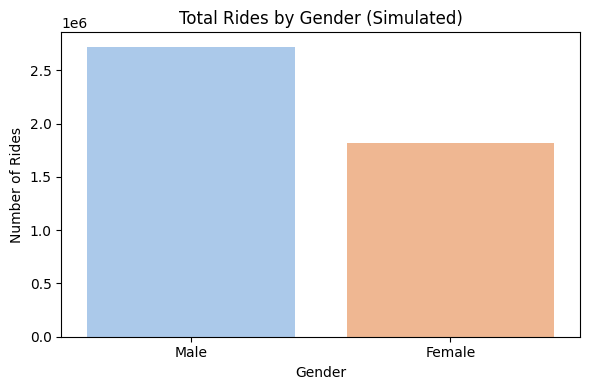

In [48]:
# Example: Save Total Rides by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_counts, x='Gender', y='Total Rides', palette='pastel')
plt.title("Total Rides by Gender (Simulated)")
plt.ylabel("Number of Rides")
plt.xlabel("Gender")
plt.tight_layout()
plt.savefig("total_rides_by_gender.png")
plt.show()


In [58]:
plt.savefig(f"heatmap_{str(gender).lower()}.png")


<Figure size 640x480 with 0 Axes>

In [53]:
# Convert Gender from numeric to string if not already
gender_map = {0: 'Male', 1: 'Female'}
data['Gender'] = data['Gender'].map(gender_map)


In [55]:
print(data[['Gender', 'DayOfWeek', 'Hour']].head())
print(data['DayOfWeek'].unique())
print(data['Hour'].unique())


   Gender  DayOfWeek  Hour
0  Female          1     0
1    Male          1     0
2    Male          1     0
3    Male          1     0
4  Female          1     0
[1 2 3 4 5 6 0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [56]:
# Recreate datetime columns properly
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')
data.dropna(subset=['Date/Time'], inplace=True)  # Remove bad dates

data['Hour'] = data['Date/Time'].dt.hour
data['DayOfWeek'] = data['Date/Time'].dt.day_name()


In [57]:
pivot_data = data.groupby(['Gender', 'DayOfWeek', 'Hour']).size().reset_index(name='Total')
print(pivot_data.head())


   Gender DayOfWeek  Hour  Total
0  Female    Friday     0   6945
1  Female    Friday     1   4105
2  Female    Friday     2   2668
3  Female    Friday     3   3478
4  Female    Friday     4   4275
